# The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: cars-dataset.csv

# 1. Launch a new python notebook and read the data set. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points


In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Read the dataset

mpg_df = pd.read_csv("cars-dataset.csv")  


mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [82]:
mpg_df.describe()


,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [83]:
duplicateRowsDF = mpg_df[mpg_df.duplicated(['car name'])]
 
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
                              car name  cyl   disp   hp    wt   acc  yr   mpg
29                        datsun pl510    4   97.0   88  2130  14.5  71  27.0
33                         amc gremlin    6  232.0  100  2634  13.0  71  19.0
35           chevrolet chevelle malibu    6  250.0  100  3329  15.5  71  17.0
38                    chevrolet impala    8  350.0  165  4209  12.0  71  14.0
40                    ford galaxie 500    8  351.0  153  4154  13.5  71  14.0
41                   plymouth fury iii    8  318.0  150  4096  13.0  71  14.0
62                    chevrolet impala    8  350.0  165  4274  12.0  72  13.0
63                    pontiac catalina    8  400.0  175  4385  12.0  72  14.0
64                   plymouth fury iii    8  318.0  150  4135  13.5  72  15.0
65                    ford galaxie 500    8  351.0  153  4129  13.0  72  14.0
86                         amc matador    8  304.0  150  3672  11.5  73  14.0
99                 

In [84]:
# drop the car name column as it is useless for the model
car_name = mpg_df['car name']
mpg_df = mpg_df.drop('car name', axis=1)


In [85]:
# horsepower is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 
temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['hp'] == False]   # from temp take only those rows where hp has false

# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)
median = mpg_df['hp'].median()
mpg_df.fillna(median, inplace=True)



In [86]:
# converting the hp column from object / string type to float
mpg_df['hp'] = mpg_df['hp'].astype('float64')  

In [87]:
mpg_df.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [88]:
mpg_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [89]:
mpg_df = mpg_df.apply(zscore)
mpg_df.head().T

,0,1,2,3,4
cyl,1.498191,1.498191,1.498191,1.498191,1.498191
disp,1.090604,1.503514,1.196232,1.061796,1.042591
hp,0.673118,1.589958,1.197027,1.197027,0.935072
wt,0.630870,0.854333,0.550470,0.546923,0.565841
acc,-1.295498,-1.477038,-1.658577,-1.295498,-1.840117
yr,-1.627426,-1.627426,-1.627426,-1.627426,-1.627426
mpg,-0.706439,-1.090751,-0.706439,-0.962647,-0.834543


# 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points


C:\Users\Sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


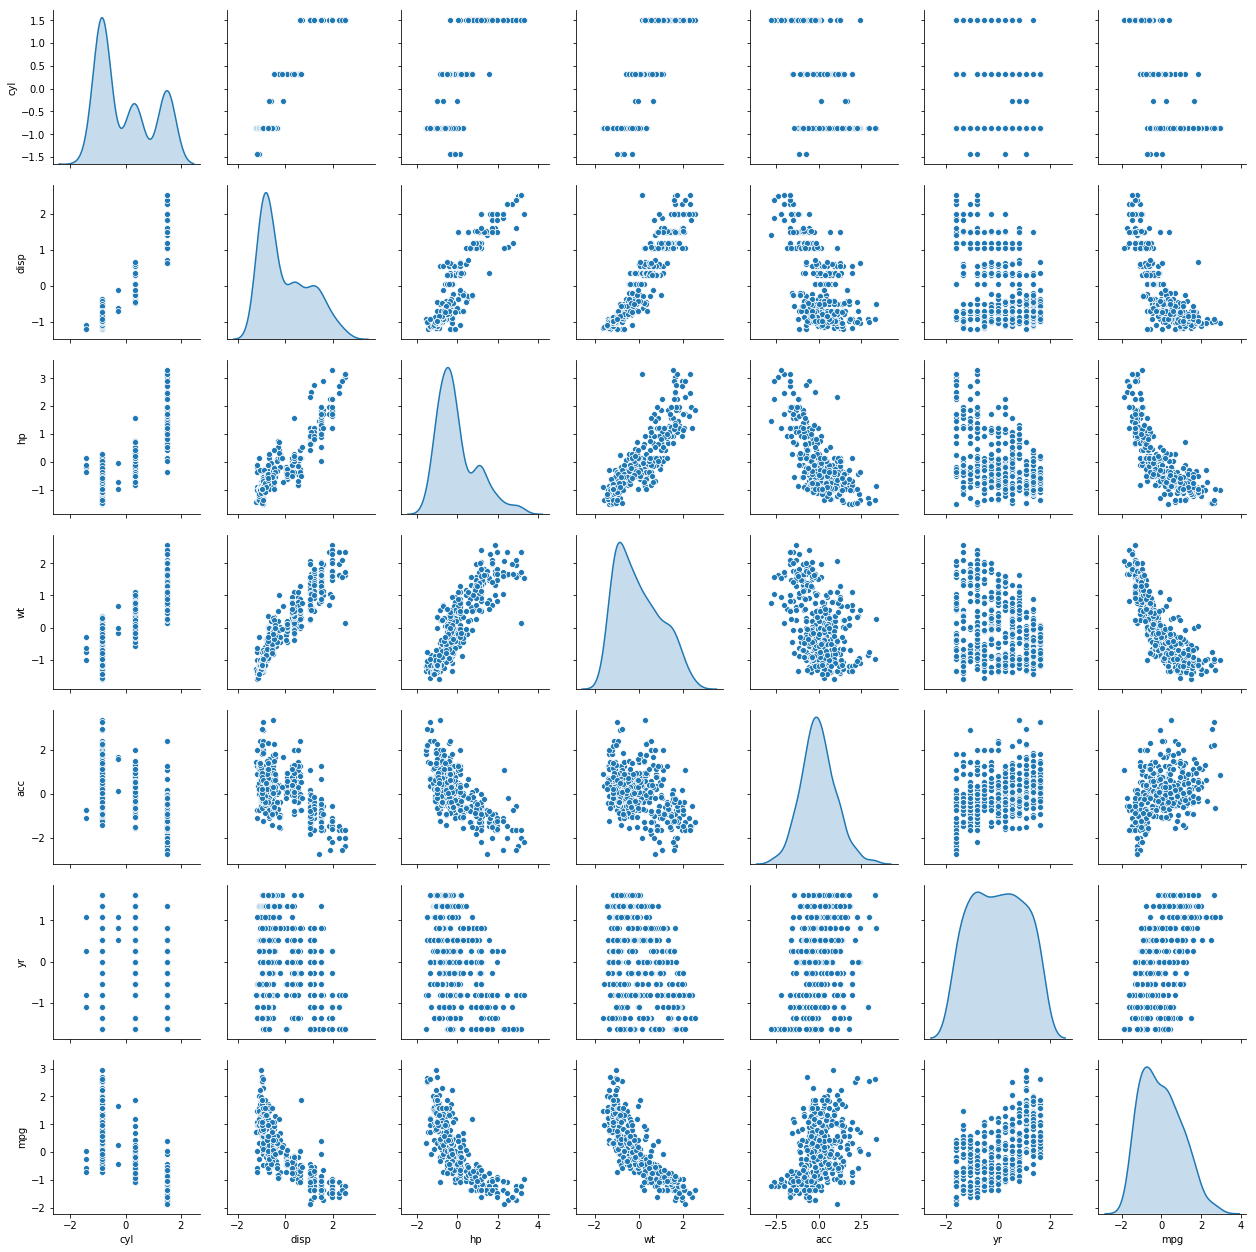

In [90]:
#Let us check for pair plots
sns.pairplot(mpg_df,diag_kind='kde')

# 3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1294.841895
1,3,946.019791
2,4,738.392328
3,5,669.429856


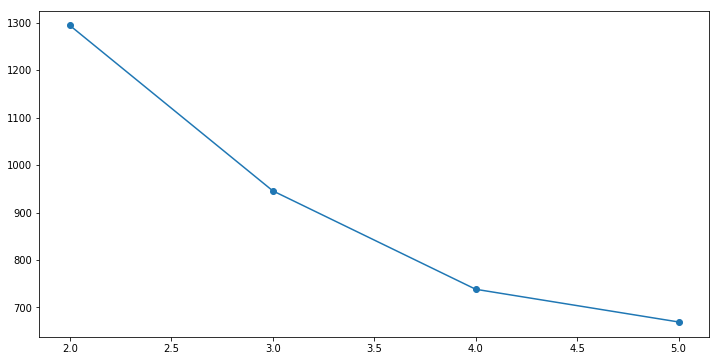

In [92]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Based on the elbow graph observation , There can be 4 cluster  

In [93]:
final_model=KMeans(4)
final_model.fit(mpg_df)
prediction=final_model.predict(mpg_df)
mpg_df_z = mpg_df.copy(deep = True)
mpg_df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [94]:
mpg_df["GROUP"] = prediction
print("Groups Assigned : \n")
mpg_df[["GROUP"]].head()
mpg_df.sample(10)

Groups Assigned : 



,cyl,disp,hp,wt,acc,yr,mpg,GROUP
38,1.498191,1.503514,1.589958,1.464423,-1.295498,-1.356642,-1.218855,1
144,-0.856321,-1.127590,-1.370127,-1.562379,0.338357,-0.544290,0.958913,0
226,0.320935,0.360808,0.018232,0.537465,0.483588,0.268063,-0.386179,3
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,1
307,0.320935,-0.196141,0.280186,-0.319735,-0.968727,0.809631,0.420876,3
293,-0.856321,-1.002757,-0.872414,-1.236052,-0.569341,0.809631,1.074207,2
119,-0.856321,-0.762693,-0.348505,-0.459252,-0.569341,-0.815074,-0.450231,0
230,1.498191,1.503514,1.720935,1.412400,-1.513346,0.268063,-1.026699,1
358,-0.856321,-0.705077,-0.793827,-0.396587,0.991899,1.351199,1.035775,2
147,-0.856321,-0.993154,-0.767632,-1.019683,-0.024722,-0.544290,0.062185,0


# 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [95]:
mpg_df.groupby(["GROUP"]).count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,100,100,100,100,100,100,100
1,94,94,94,94,94,94,94
2,114,114,114,114,114,114,114
3,90,90,90,90,90,90,90


In [70]:
# Copy all the predictor variables into X dataframe. Since 'GROUP' is dependent variable drop it
X = mpg_df.drop('GROUP', axis=1)

# Copy the 'GROUP' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['GROUP']]


In [96]:
regression_model = LinearRegression()
#regression_model.fit(X, y)

In [72]:
regression_model.coef_

array([[-0.44688703, -0.32627834, -0.29662035, -0.31969674,  0.13542888,
        -0.2475602 , -0.75461358]])

In [74]:
#mpg_df1 = mpg_df[mpg_df['GROUP']==0]
#mpg_df2 = mpg_df[mpg_df['GROUP']==1]
#mpg_df3 = mpg_df[mpg_df['GROUP']==2]
#mpg_df4 = mpg_df[mpg_df['GROUP']==3]


In [121]:
Group_range = range(0,4)
cluster_ModelCoef = []
#n=0
for n in Group_range:
    # Copy all the predictor variables into X dataframe. Since 'GROUP' is dependent variable drop it
    mpg_df1 = mpg_df[mpg_df['GROUP']==n]
    X = mpg_df1.drop('GROUP', axis=1)
    y = mpg_df1[['GROUP']]
    regression_model.fit(X, y)
    #cluster_ModelCoef_DF1 = cluster_ModelCoef_DF.append(pd.DataFrame(regression_model.coef_, columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'] ))
    print('Group :' , n )
    DF = pd.DataFrame(regression_model.coef_, columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'] )
    print(DF)
    DF['GROUP'] = n
    n=n+1

Group : 0
   cyl  disp   hp   wt  acc   yr  mpg
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
Group : 1
   cyl  disp   hp   wt  acc   yr  mpg
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
Group : 2
   cyl  disp   hp   wt  acc   yr  mpg
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
Group : 3
   cyl  disp   hp   wt  acc   yr  mpg
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
